# **CS675 – Introduction to Data Science (CRN: 73405)**

_____

**RAJAT TIWARI**

**U01954832**

We will start the project with importing all the necessary libraries.

In [11]:
# Diabetes Dataset Exploratory Data Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

The data is available in .dat format, and we can load it using NumPy's genfromtxt() function.

The imported data is raw, so now we will convert it into DataFrames to handle it efficiently.

In [12]:
# 1. Data Preparation

# Load the data
url = "https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data"
column_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'y']
data = np.genfromtxt(url, skip_header=1)
df = pd.DataFrame(data, columns=column_names)

print("Dataset shape:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset shape: (442, 11)

First few rows of the dataset:
    age  sex   bmi     bp     s1     s2    s3   s4      s5    s6      y
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0  151.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0   75.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0  141.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0  206.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0  135.0


Checking for missing values in each column of the DataFrame and printing the count of missing values per column.

In [13]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
y      0
dtype: int64


Checking for NaN values in each column and printing the count per column.

---



In [14]:
# Check for NaN values
print("\nNaN values:")
print(df.isna().sum())


NaN values:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
y      0
dtype: int64


Let's calculate the Z-scores for each value in the DataFrame to help identify potential outliers.

In [18]:
# Identify outliers using Z-score
z_scores = np.abs(stats.zscore(df))
print(z_scores)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.800500  1.065488  1.297088  0.459841  0.929746  0.732065  0.912451   
1    0.039567  0.938537  1.082180  0.553505  0.177624  0.402886  1.564414   
2    1.793307  1.065488  0.934533  0.119214  0.958674  0.718897  0.680245   
3    1.872441  0.938537  0.243771  0.770650  0.256292  0.525397  0.757647   
4    0.113172  0.938537  0.764944  0.459841  0.082726  0.327890  0.171178   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.876870  1.065488  0.413360  1.256040  0.119769  0.053957  0.602843   
438  0.115937  1.065488  0.334410  1.422086  1.037341  1.664355  0.602843   
439  0.876870  1.065488  0.334410  0.363573  0.785107  0.290965  0.525441   
440  0.956004  0.938537  0.821235  0.025550  0.343075  0.321306  0.602843   
441  0.956004  0.938537  1.535374  1.711613  1.760535  0.584649  3.654268   

           s4        s5        s6         y  
0    0.054499  0.418531  0.37

Let's count and print the number of outliers in each column where the Z-score is greater than 3.

In [19]:
outliers = (z_scores > 3).sum()
print("\nNumber of outliers (Z-score > 3) in each column:")
print(outliers)


Number of outliers (Z-score > 3) in each column:
age    0
sex    0
bmi    2
bp     0
s1     2
s2     2
s3     5
s4     4
s5     0
s6     0
y      0
dtype: int64


In [16]:
# 2. Data Types

print("\nData types:")
print(df.dtypes)


Data types:
age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
y      float64
dtype: object


### **Exploratory Data Analysis**



Let's create and display a heatmap of the correlation matrix, showing the relationships between different columns in the DataFrame.

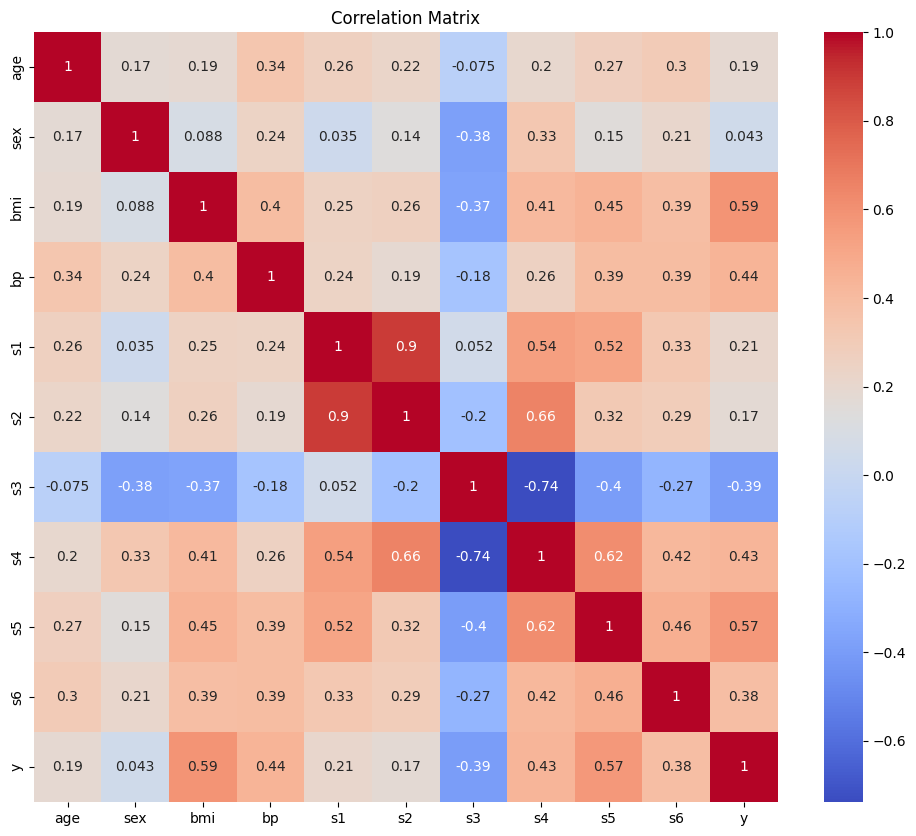

In [17]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Let'a use a pairplot to visualize relationships between pairs of features in the DataFrame

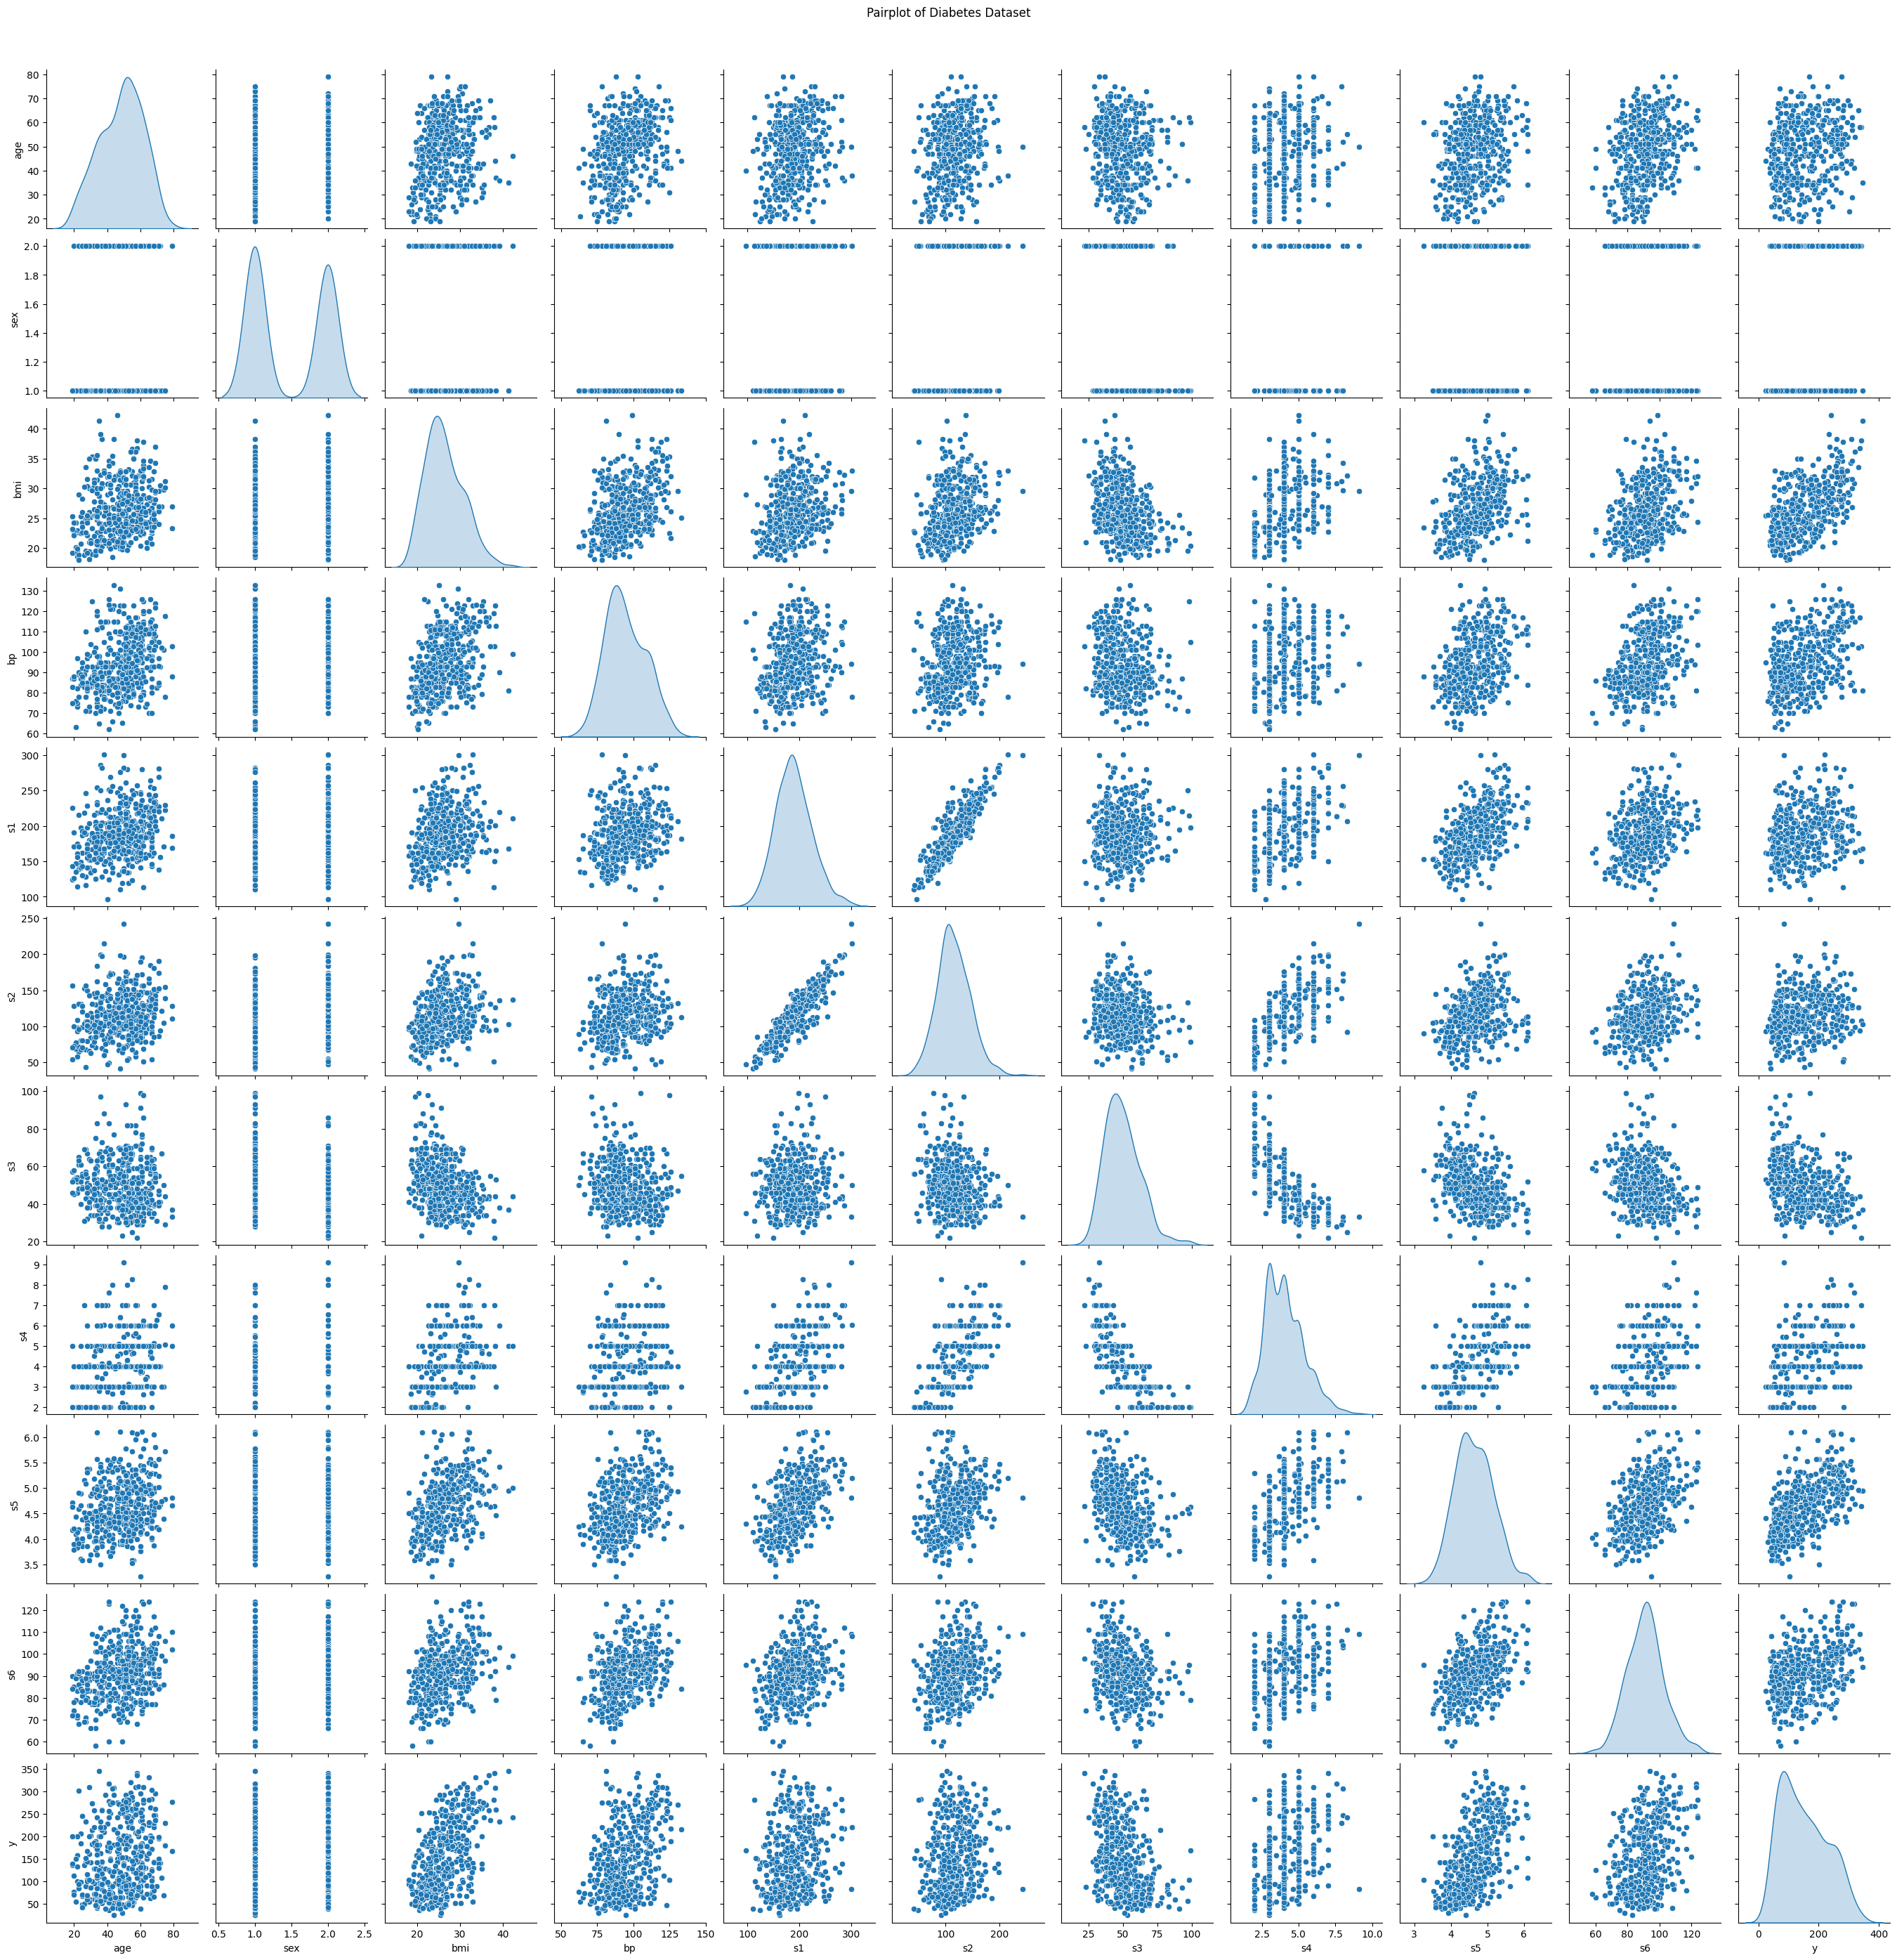

In [28]:
# Pairplot
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Diabetes Dataset', y=1.02)
plt.show()

In [20]:
# Feature importance using linear regression
X = df.drop('y', axis=1)
y = df['y']
model = sm.OLS(y, sm.add_constant(X)).fit()
feature_importance = pd.Series(model.params[1:], index=X.columns).sort_values(ascending=False)

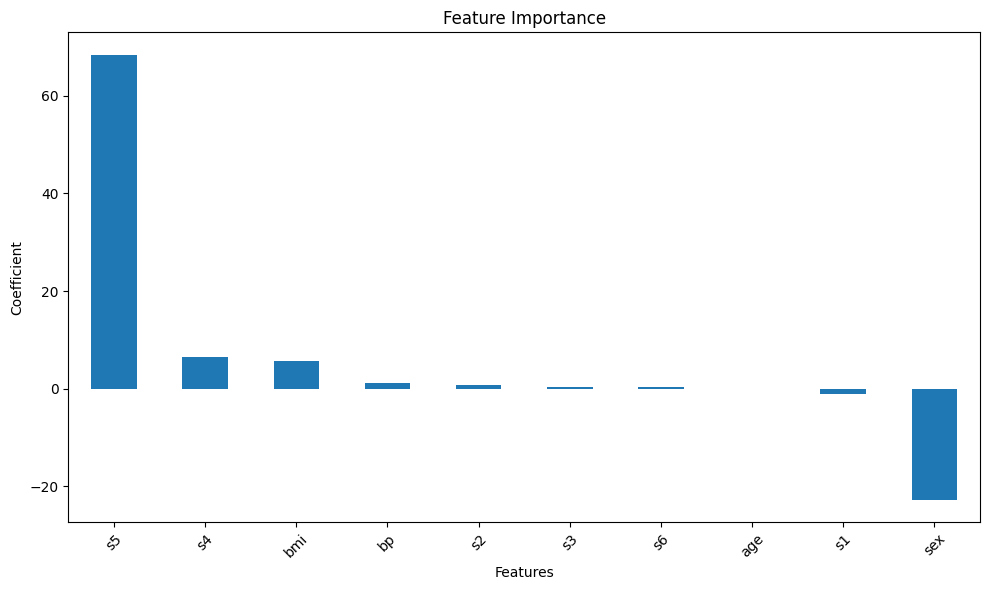

In [21]:
#Plotting Feature Importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Print the Feature Importance Values

In [22]:
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
s5     68.483125
s4      6.533832
bmi     5.602962
bp      1.116808
s2      0.746450
s3      0.372005
s6      0.280117
age    -0.036361
s1     -1.089996
sex   -22.859648
dtype: float64


Visualizing using Scatter Plots to get a better understanding of how Y relates with BMI, Age, Bp, and Sex.

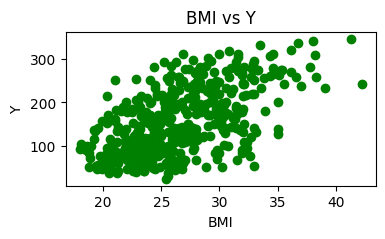

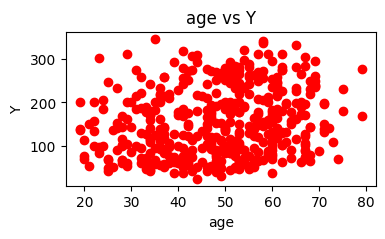

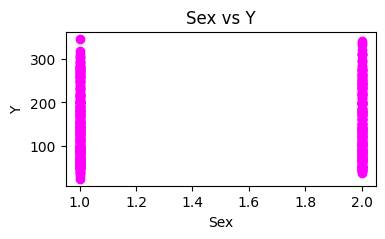

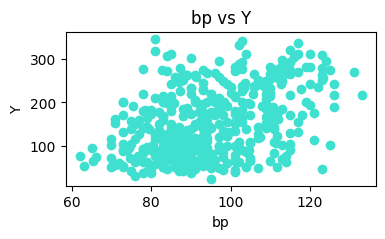

In [27]:
# Scatter plot between BMI and target
plt.figure(figsize=(4, 2))
plt.scatter(df['bmi'], df['y'], color='green')
plt.title('BMI vs Y')
plt.xlabel('BMI')
plt.ylabel('Y')
plt.show()

# Scatter plot between Age and target
plt.figure(figsize=(4, 2))
plt.scatter(df['age'], df['y'], color='red')
plt.title('age vs Y')
plt.xlabel('age')
plt.ylabel('Y')
plt.show()

# Scatter plot between Sex and target
plt.figure(figsize=(4, 2))
plt.scatter(df['sex'], df['y'], color='magenta')
plt.title('Sex vs Y')
plt.xlabel('Sex')
plt.ylabel('Y')
plt.show()

# Scatter plot between Bp and target
plt.figure(figsize=(4, 2))
plt.scatter(df['bp'], df['y'], color='turquoise')
plt.title('bp vs Y')
plt.xlabel('bp')
plt.ylabel('Y')
plt.show()

# 4. Limitations and Issues

Limitations and Issues:

1. Sample size: The dataset contains only 442 records, which may limit the generalizability of findings.

2. Feature interpretation: Some features (s1-s6) are not clearly labeled, making interpretation challenging.

3. Outliers: There are outliers in the dataset that may affect the analysis and future modeling.

4. Limited demographic information: Only age and sex are provided, which may not capture all relevant factors.

**CONCLUSION**

We observed strong correlations between certain features, such as 'BMI' (Feature variable) and 'Y' (Target variable), which may play a crucial role in predicting diabetes progression.

The heatmap and pairplot provided a visual representation of the relationships among the variables, confirming that some features are more influential than others.

Additionally, outlier detection helped identify extreme data points that could affect the accuracy of future predictions.

Overall, this EDA provided a solid foundation for further analysis and eventual model building by identifying the most important features and addressing the dataset’s shortcomings.